In [31]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from openbb_terminal.sdk import openbb
import yfinance as yf


In [47]:
pd.options.display.float_format = '{:.4%}'.format
# Date range
start_date = pd.to_datetime('2020-11-01')
end_date = pd.to_datetime('2023-11-01')

In [48]:
SP=(pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0])
assets=SP.Symbol.tolist()

In [49]:
assets.sort()
print(assets)

['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'AMAT', 'AMCR', 'AMD', 'AME', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANET', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'APTV', 'ARE', 'ATO', 'AVB', 'AVGO', 'AVY', 'AWK', 'AXON', 'AXP', 'AZO', 'BA', 'BAC', 'BALL', 'BAX', 'BBWI', 'BBY', 'BDX', 'BEN', 'BF.B', 'BG', 'BIIB', 'BIO', 'BK', 'BKNG', 'BKR', 'BLK', 'BMY', 'BR', 'BRK.B', 'BRO', 'BSX', 'BWA', 'BX', 'BXP', 'C', 'CAG', 'CAH', 'CARR', 'CAT', 'CB', 'CBOE', 'CBRE', 'CCI', 'CCL', 'CDAY', 'CDNS', 'CDW', 'CE', 'CEG', 'CF', 'CFG', 'CHD', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COO', 'COP', 'COR', 'COST', 'CPB', 'CPRT', 'CPT', 'CRL', 'CRM', 'CSCO', 'CSGP', 'CSX', 'CTAS', 'CTLT', 'CTRA', 'CTSH', 'CTVA', 'CVS', 'CVX', 'CZR', 'D', 'DAL', 'DD', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DLR', '

In [50]:
assets=['AAPL','GOOG','AMZN','AIG','BAC','C','CSCO','CVX','DIS','EBAY','F','GE','GM','GS','HD','HPQ','IBM','INTC','JNJ','JPM'] 

In [73]:
#data = yf.download(assets, start = start_date, end = end_date)
#data = data.loc[:,('Adj Close', slice(None))]
#data.columns = assets
#print (data.head())

In [66]:
data = openbb.stocks.ca.hist(
    assets,
    start_date=start_date,
    end_date=end_date
)

print(data)

                  AAPL        GOOG        AMZN        AIG        BAC  \
Date                                                                   
2020-11-02 10669.8257%  8130.1498% 15022.3999% 3012.3550% 2242.9367%   
2020-11-03 10833.6479%  8251.0498% 15242.0502% 3053.2001% 2299.7553%   
2020-11-04 11276.0559%  8745.6497% 16205.7999% 2932.5203% 2205.6782%   
2020-11-05 11676.2863%  8816.8503% 16610.0006% 3103.3289% 2292.3035%   
2020-11-06 11663.0211%  8808.7502% 16556.8497% 3078.2650% 2264.3599%   
...                ...         ...         ...        ...        ...   
2023-10-26 16667.0425% 12344.0002% 11957.0000% 6084.9998% 2612.0001%   
2023-10-27 16799.8672% 12340.0002% 12773.9998% 5952.9999% 2517.0000%   
2023-10-30 17006.5933% 12575.0000% 13271.0007% 6100.0000% 2569.0001%   
2023-10-31 17054.5319% 12530.0003% 13308.9996% 6131.0001% 2634.0000%   
2023-11-01 17374.1104% 12757.0000% 13700.0000% 6204.9999% 2640.0000%   

                    C       CSCO         CVX         DIS       

In [74]:
Y=data[assets].pct_change().dropna()

In [75]:
print(Y)

               AAPL     GOOG     AMZN      AIG      BAC        C     CSCO  \
Date                                                                        
2020-11-03  1.5354%  1.4871%  1.4622%  1.3559%  2.5332%  3.1272%  2.1727%   
2020-11-04  4.0836%  5.9944%  6.3230% -3.9526% -4.0907% -3.3310% -0.2999%   
2020-11-05  3.5494%  0.8141%  2.4942%  5.8246%  3.9274%  2.3527%  1.8048%   
2020-11-06 -0.1136% -0.0919% -0.3200% -0.8076% -1.2190% -0.8359%  0.8058%   
2020-11-09 -1.9968%  0.0710% -5.0623% 13.1483% 14.1917% 11.5430%  1.7852%   
...             ...      ...      ...      ...      ...      ...      ...   
2023-10-26 -2.4606% -2.5499% -1.4993% -0.1804%  2.2309%  1.8907% -1.9657%   
2023-10-27  0.7969% -0.0324%  6.8328% -2.1693% -3.6371% -2.7961%  0.3699%   
2023-10-30  1.2305%  1.9044%  3.8907%  2.4693%  2.0660%  1.8044%  0.0194%   
2023-10-31  0.2819% -0.3579%  0.2863%  0.5082%  2.5302%  1.4385%  1.0859%   
2023-11-01  1.8739%  1.8116%  2.9379%  1.2070%  0.2278%  0.2785%  0.1151%   

In [76]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,GOOG,AMZN,AIG,BAC,C,CSCO,CVX,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM
weights,12.5233%,3.1009%,0.0000%,2.2506%,0.0000%,0.0000%,9.4738%,34.8661%,0.0000%,0.0000%,0.0000%,22.5290%,0.0000%,0.0000%,0.0000%,0.0000%,15.2562%,0.0000%,0.0000%,0.0000%


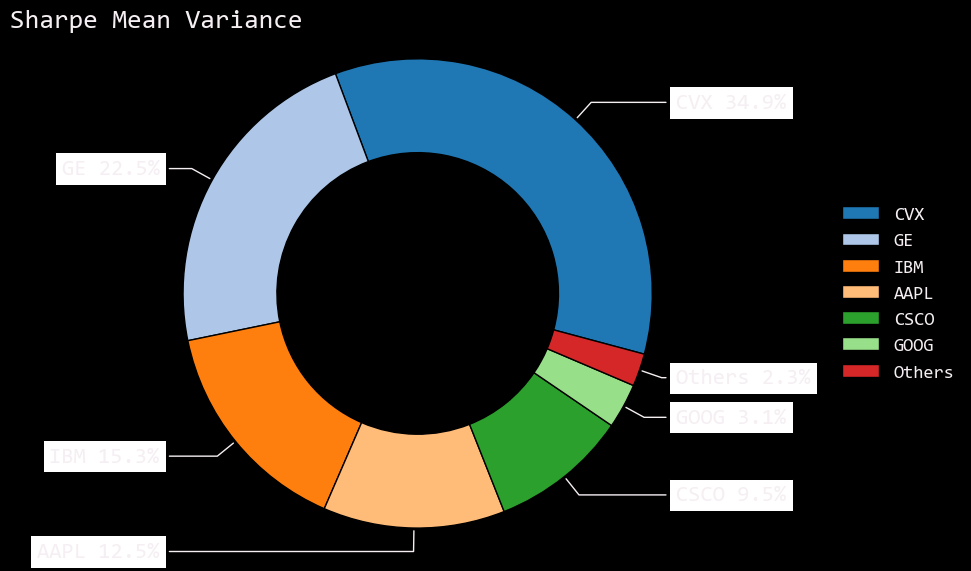

In [77]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [78]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,GOOG,AMZN,AIG,BAC,C,CSCO,CVX,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM
0,1.4110%,1.4687%,2.3319%,0.0000%,0.0000%,0.0000%,4.6616%,9.4044%,0.8654%,0.7879%,0.0000%,0.4771%,0.0000%,0.3569%,10.0640%,0.0000%,13.9602%,0.0000%,52.8446%,1.3661%
1,4.3803%,3.3270%,0.0000%,0.0000%,0.0000%,0.0000%,6.1388%,13.0209%,0.0000%,0.0000%,0.0000%,4.2341%,0.0000%,1.3641%,6.9525%,0.0000%,14.7032%,0.0000%,45.8792%,0.0000%
2,5.3071%,3.5129%,0.0000%,0.0000%,0.0000%,0.0000%,6.7248%,14.6795%,0.0000%,0.0000%,0.0000%,5.7408%,0.0000%,1.2106%,5.0723%,0.0000%,15.0322%,0.0000%,42.7197%,0.0000%
3,6.0118%,3.6545%,0.0000%,0.0000%,0.0000%,0.0000%,7.1705%,15.9401%,0.0000%,0.0000%,0.0000%,6.8864%,0.0000%,1.0939%,3.6433%,0.0000%,15.2824%,0.0000%,40.3171%,0.0000%
4,6.6076%,3.7738%,0.0000%,0.0000%,0.0000%,0.0000%,7.5475%,17.0050%,0.0000%,0.0000%,0.0000%,7.8545%,0.0000%,0.9944%,2.4353%,0.0000%,15.4942%,0.0000%,38.2878%,0.0000%


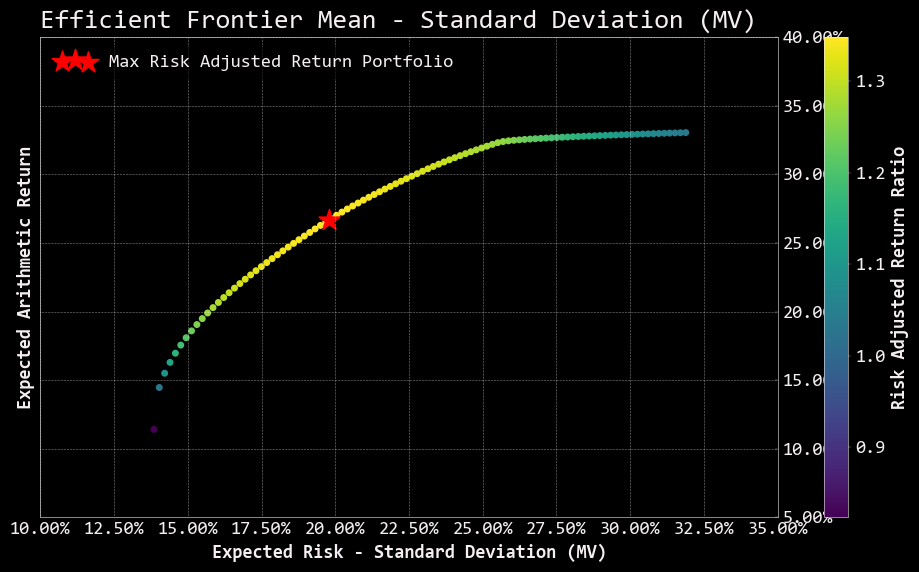

In [79]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

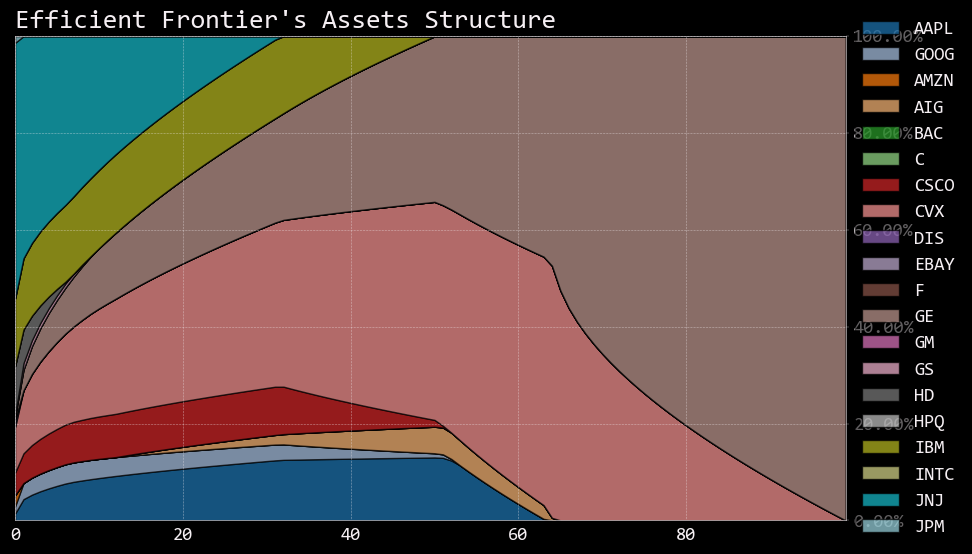

In [80]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

In [82]:
#Calculating the portfolio that maximizes Return/CVaR ratio.
rm = 'CVaR' # Risk measure

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,GOOG,AMZN,AIG,BAC,C,CSCO,CVX,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM
weights,0.3857%,2.8698%,0.0000%,4.5300%,0.0000%,0.0000%,11.1621%,36.3322%,0.0000%,0.0000%,0.0000%,23.4493%,0.0000%,8.7987%,0.0000%,0.0000%,12.4722%,0.0000%,0.0000%,0.0000%


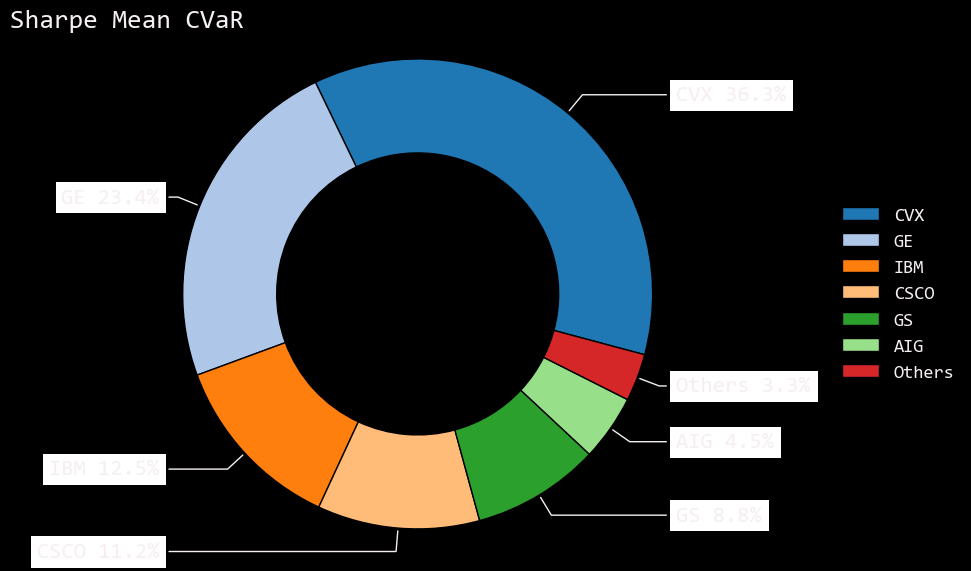

In [83]:
ax = rp.plot_pie(w=w, title='Sharpe Mean CVaR', others=0.05, nrow=25, cmap = "tab20",
                height=6, width=10, ax=None)

In [84]:
points = 100 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,GOOG,AMZN,AIG,BAC,C,CSCO,CVX,DIS,EBAY,F,GE,GM,GS,HD,HPQ,IBM,INTC,JNJ,JPM
0,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,2.6253%,13.2746%,0.9021%,0.0000%,0.0000%,0.0000%,0.0000%,5.8718%,4.4947%,0.0000%,19.8355%,0.0000%,51.7333%,1.2626%
1,0.0402%,0.8496%,0.0000%,3.9626%,0.0000%,0.0000%,5.1591%,15.4986%,0.0000%,0.0000%,0.0000%,1.0000%,0.0000%,8.5699%,0.0000%,0.0000%,17.6953%,0.0000%,47.2248%,0.0000%
2,0.0000%,0.7769%,0.0000%,3.7205%,0.0000%,0.0000%,5.2320%,17.5640%,0.0000%,0.0000%,0.0000%,1.1418%,0.0000%,9.4168%,0.0000%,0.0000%,17.5512%,0.0000%,44.5966%,0.0000%
3,0.0000%,0.7767%,0.0000%,3.6269%,0.0000%,0.0000%,6.3623%,18.5220%,0.0000%,0.0000%,0.0000%,1.2635%,0.0000%,10.5609%,0.0000%,0.0000%,17.2756%,0.0000%,41.6121%,0.0000%
4,0.0000%,1.4394%,0.0000%,2.9554%,0.0000%,0.0000%,7.5249%,18.6306%,0.0000%,0.0000%,0.0000%,1.8598%,0.0000%,12.1061%,0.0000%,0.0000%,17.1657%,0.0000%,38.3182%,0.0000%


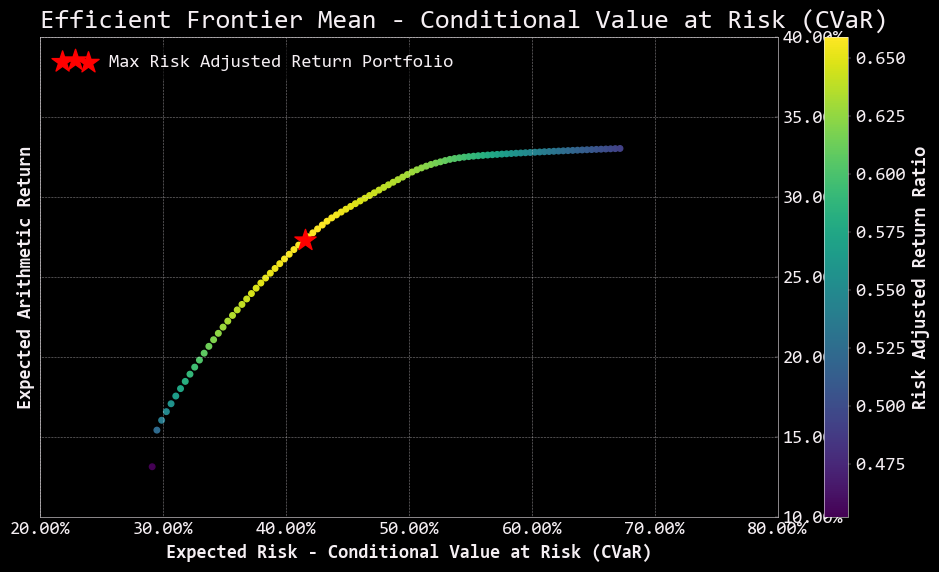

In [85]:
label = 'Max Risk Adjusted Return Portfolio' # Title of point

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                    rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                    marker='*', s=16, c='r', height=6, width=10, ax=None)


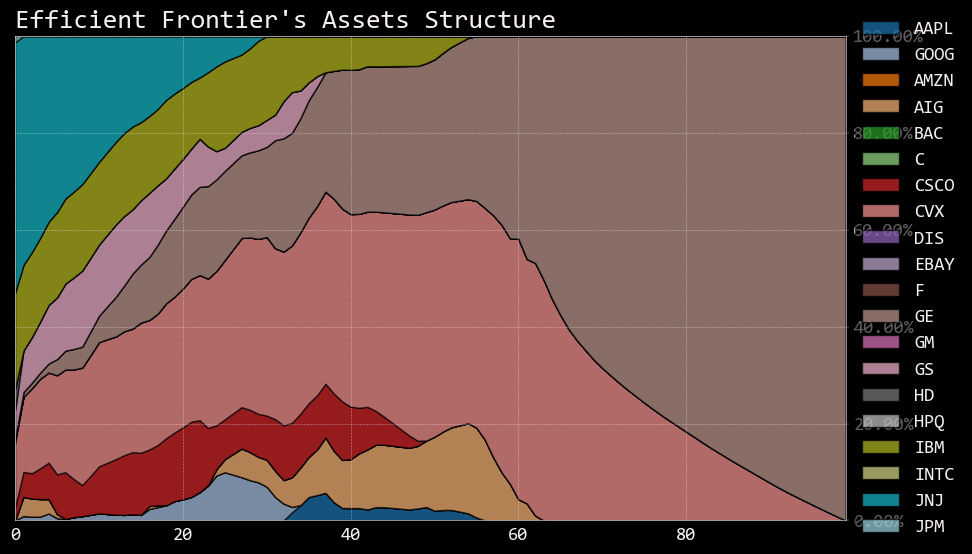

In [86]:
# Plotting efficient frontier composition
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)